In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-01-03 05:42:10--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 74.125.128.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  39.0MB/s    in 4.2s    

2023-01-03 05:42:14 (33.6 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [3]:
import zipfile
zipref=zipfile.ZipFile(r'/content/horse-or-human.zip')
zipref.extractall('./horse-or-human')
zipref.close()

In [4]:
import os
train_horse_dir=os.path.join('./horse-or-human/horses')
train_humans_dir=os.path.join('./horse-or-human/humans')

In [5]:
train_horse_names=os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names=os.listdir(train_humans_dir)
print(train_human_names[:10])

['horse21-3.png', 'horse04-7.png', 'horse43-9.png', 'horse19-8.png', 'horse18-2.png', 'horse27-1.png', 'horse17-0.png', 'horse30-8.png', 'horse10-9.png', 'horse48-7.png']
['human04-06.png', 'human01-16.png', 'human16-13.png', 'human03-18.png', 'human12-24.png', 'human13-05.png', 'human02-19.png', 'human17-01.png', 'human11-03.png', 'human11-19.png']


In [6]:
print('total training horse images:', len(train_horse_names))
print('total training human images:', len(train_human_names))

total training horse images: 500
total training human images: 527


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows=4
ncols=4
pic_index=0

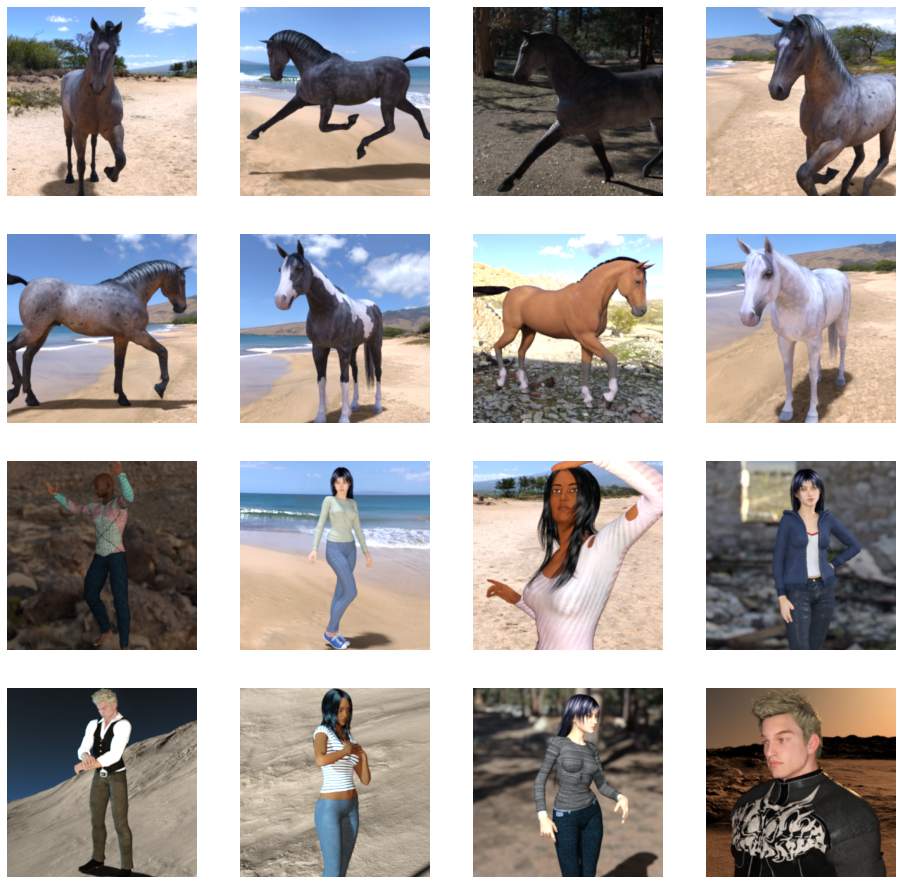

In [8]:
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

pic_index +=8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_humans_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp=plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img=mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
from tensorflow import keras

In [10]:
model=keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    keras.layers.MaxPooling2D(2,2),
#2nd
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
#3rd
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
#4th
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
#5th
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
#dnn
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [12]:
from keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics='accuracy')

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen= ImageDataGenerator(rescale=1/255)
train_generator= train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [15]:
history= model.fit(train_generator, steps_per_epoch=8, epochs=15, verbose=1)

Epoch 1/15
8/8 [==============================] - 16s 651ms/step - loss: 0.7282 - accuracy: 0.6140
Epoch 2/15
8/8 [==============================] - 6s 700ms/step - loss: 0.7544 - accuracy: 0.6196
Epoch 3/15
8/8 [==============================] - 7s 745ms/step - loss: 1.7554 - accuracy: 0.7642
Epoch 4/15
8/8 [==============================] - 6s 710ms/step - loss: 0.4765 - accuracy: 0.8788
Epoch 5/15
8/8 [==============================] - 6s 705ms/step - loss: 0.2307 - accuracy: 0.9177
Epoch 6/15
8/8 [==============================] - 6s 710ms/step - loss: 0.1982 - accuracy: 0.9188
Epoch 7/15
8/8 [==============================] - 6s 716ms/step - loss: 0.1885 - accuracy: 0.9166
Epoch 8/15
8/8 [==============================] - 6s 694ms/step - loss: 0.1105 - accuracy: 0.9600
Epoch 9/15
8/8 [==============================] - 7s 819ms/step - loss: 0.6332 - accuracy: 0.8506
Epoch 10/15
8/8 [==============================] - 6s 723ms/step - loss: 0.1799 - accuracy: 0.9355
Epoch 11/15
8/8 [=

In [16]:
import numpy as np
from google.colab import files
from keras.utils import load_img, img_to_array

In [22]:
uploaded=files.upload()
for fn in uploaded.keys():
  print(fn)
  path='/content/'+fn
  img=load_img(path, target_size=(300,300))
  x=img_to_array(img)
  x/=255
  print(x)
  x=np.expand_dims(x, axis=0)
  print(x)
  images = np.vstack([x])
  print(images)
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(classes[0])

  if classes[0]>0.5:
    print(fn+' is a human')
  else:
    print(fn+' is a horse')

Saving How-to-draw-a-human-1.png to How-to-draw-a-human-1.png
Saving human-rights-exhibits.jpg to human-rights-exhibits.jpg
Saving deloitte-nl-cm-digital-human-promo.png to deloitte-nl-cm-digital-human-promo (1).png
Saving images.jpg to images (1).jpg
Saving pexels-helena-lopes-1996333.jpg to pexels-helena-lopes-1996333 (2).jpg
How-to-draw-a-human-1.png
[[[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99215686 1.         1.        ]
  [0.99215686 1.         1.        ]
  [0.99215686 1.         1.        ]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99215686 1.         1.        ]
  [0.99215686 1.         1.        ]
  [0.99215686 1.         1.        ]]

 [[0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.99215686 1.         1.        ]
  [0.99215686 1.         1.   

In [23]:
uploaded=files.upload()
for fn in uploaded.keys():
  print(fn)
  path='/content/'+fn
  img=load_img(path, target_size=(300,300))
  x=img_to_array(img)
  x/=255
  print(x)
  x=np.expand_dims(x, axis=0)
  print(x)
  images = np.vstack([x])
  print(images)
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(classes[0])

  if classes[0]>0.5:
    print(fn+' is a human')
  else:
    print(fn+' is a horse')

Saving humangettyimages-1279395367-612x612.jpg to humangettyimages-1279395367-612x612.jpg
Saving horsegettyimages-1361130411-612x612.jpg to horsegettyimages-1361130411-612x612.jpg
Saving horsegettyimages-1290560472-2048x2048.jpg to horsegettyimages-1290560472-2048x2048.jpg
Saving humangettyimages-1081866148-2048x2048.jpg to humangettyimages-1081866148-2048x2048.jpg
humangettyimages-1279395367-612x612.jpg
[[[0.7254902  0.74509805 0.7294118 ]
  [0.7254902  0.74509805 0.7294118 ]
  [0.7254902  0.74509805 0.7294118 ]
  ...
  [0.99607843 1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.7254902  0.74509805 0.7294118 ]
  [0.7254902  0.74509805 0.7294118 ]
  [0.7254902  0.74509805 0.7294118 ]
  ...
  [0.99607843 1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.7254902  0.74509805 0.7294118 ]
  [0.7254902  0.74509805 0.7294118 ]
  [0.7254902  0.74509805 0.7294118 ]
  ...
  [0.99607843 1

In [24]:
uploaded=files.upload()
for fn in uploaded.keys():
  print(fn)
  path='/content/'+fn
  img=load_img(path, target_size=(300,300))
  x=img_to_array(img)
  x/=255
  print(x)
  x=np.expand_dims(x, axis=0)
  print(x)
  images = np.vstack([x])
  print(images)
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(classes[0])

  if classes[0]>0.5:
    print(fn+' is a human')
  else:
    print(fn+' is a horse')

Saving humangettyimages-1281269484-612x612.jpg to humangettyimages-1281269484-612x612.jpg
humangettyimages-1281269484-612x612.jpg
[[[0.33333334 0.79607844 0.9372549 ]
  [0.33333334 0.79607844 0.9372549 ]
  [0.33333334 0.79607844 0.9372549 ]
  ...
  [0.01176471 0.74509805 0.92156863]
  [0.00784314 0.7372549  0.92156863]
  [0.00784314 0.7372549  0.92156863]]

 [[0.33333334 0.79607844 0.9372549 ]
  [0.33333334 0.79607844 0.9372549 ]
  [0.33333334 0.79607844 0.9372549 ]
  ...
  [0.01176471 0.74509805 0.92156863]
  [0.01176471 0.7411765  0.9254902 ]
  [0.01176471 0.7411765  0.9254902 ]]

 [[0.33333334 0.79607844 0.9372549 ]
  [0.33333334 0.79607844 0.9372549 ]
  [0.33333334 0.79607844 0.9372549 ]
  ...
  [0.01176471 0.74509805 0.92156863]
  [0.01176471 0.7411765  0.9254902 ]
  [0.01176471 0.7411765  0.9254902 ]]

 ...

 [[0.13333334 0.75686276 0.9098039 ]
  [0.14117648 0.7607843  0.9137255 ]
  [0.15686275 0.75686276 0.91764706]
  ...
  [0.01176471 0.7019608  0.8980392 ]
  [0.01176471 0.7019